Attenuation at 10 kHz: -0.52 dB


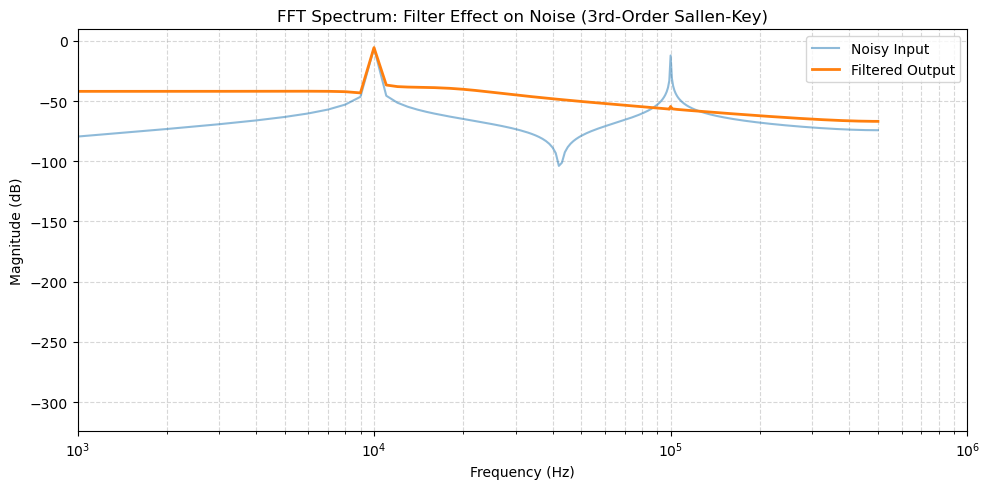

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Signal setup
fs = 1e6  # Sampling frequency (1 MHz)
t = np.arange(0, 1e-3, 1/fs)  # 1 ms duration

# Desired 10 kHz signal
f_signal = 10e3
signal_clean = np.sin(2 * np.pi * f_signal * t)

# High-frequency noise (e.g., 100 kHz)
f_noise = 100e3
noise = 0.5 * np.sin(2 * np.pi * f_noise * t)

# Noisy input
Vin_noisy = signal_clean + noise

# Filter definition (3rd-order Sallen-Key)
R1 = 44e3
R2 = 12e3
R5 = 6.8e3
C1 = 150e-12
C2 = 1e-9
C5 = 1e-9

# RC stage
num_RC = [1]
den_RC = [R5 * C5, 1]

# Sallen-Key stage
omega_0 = 1 / np.sqrt(R1 * R2 * C1 * C2)
Q = np.sqrt((R2 * C2) / (R1 * C1)) / ((R1 + R2) / R1)
num_SK = [omega_0**2]
den_SK = [1, omega_0 / Q, omega_0**2]

# Combine transfer functions
num_total = np.polymul(num_RC, num_SK)
den_total = np.polymul(den_RC, den_SK)
H_total = signal.TransferFunction(num_total, den_total)

# Calculate attenuation at 10 kHz
f_target = 10e3
w_target = 2 * np.pi * f_target
_, mag_10kHz, _ = signal.bode(H_total, [w_target])

attenuation_10kHz = -mag_10kHz[0]
# Print attenuation
print(f"Attenuation at 10 kHz: {attenuation_10kHz:.2f} dB")


# Print attenuation


# Filtered output
tout, Vout_filtered, _ = signal.lsim(H_total, Vin_noisy, t)

# FFT of signals
def compute_fft(signal_in, fs):
    n = len(signal_in)
    f = np.fft.rfftfreq(n, 1/fs)
    spectrum = np.abs(np.fft.rfft(signal_in)) / n
    return f, spectrum

f_noisy, spectrum_noisy = compute_fft(Vin_noisy, fs)
f_filtered, spectrum_filtered = compute_fft(Vout_filtered, fs)

# Plot FFT spectra
plt.figure(figsize=(10, 5))
plt.semilogx(f_noisy, 20 * np.log10(spectrum_noisy), label='Noisy Input', alpha=0.5)
plt.semilogx(f_filtered, 20 * np.log10(spectrum_filtered), label='Filtered Output', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.title('FFT Spectrum: Filter Effect on Noise (3rd-Order Sallen-Key)')
plt.xlim(1e3, 1e6)  # Zoom: 1 kHz to 1 MHz
plt.tight_layout()
plt.show()

